In [7]:
from gensim import models

file_f = open('D:/tugas-akhir/fnc-id/django_project/hoaxdetector/hoax/static/fakta_final.txt').read()
file_h = open('D:/tugas-akhir/fnc-id/django_project/hoaxdetector/hoax/static/hoax_final.txt').read()

list_f = file_f.split()
list_h = file_h.split()

sentence = models.doc2vec.LabeledSentence(
    words=list_f, tags=["SENT_fakta"])
sentence1 = models.doc2vec.LabeledSentence(
    words=list_h, tags=["SENT_hoax"])

sentences = [sentence, sentence1]
token_count = sum([len(sentence) for sentence in sentences])

class LabeledLineSentence(object):
    def __init__(self, filename):
        self.filename = filename
    def __iter__(self):
        for uid, line in enumerate(open(filename)):
            yield LabeledSentence(words=line.split(), labels=['SENT_%s' % uid])
            
model = models.Doc2Vec(dm=0, alpha=.025, min_alpha=.025, min_count=1)
model.build_vocab(sentences)


for epoch in range(10):
    model.train( sentences, total_examples = token_count, epochs = model.iter)
    model.alpha -= 0.002  # decrease the learning rate`
    model.min_alpha = model.alpha  # fix the learning rate, no decay
   

model.save("my_model.doc2vec")
model_loaded = models.Doc2Vec.load('my_model.doc2vec')


#print(model.docvecs.most_similar(["SENT_hoax"])[0][1])
#print(model.docvecs.most_similar(["SENT_fakta"]))
#print(model_loaded.docvecs.most_similar(["SENT_hoax"]))
print(model.docvecs["SENT_hoax"])

#word_vec = model['pesan']
#model.docvecs.most_similar([word_vec])
#print("fakta")
#print(model.docvecs["SENT_fakta"])


[ 0.02268304 -0.39068457 -1.36646926  0.23953335 -0.24542476  0.15400493
  0.63230669  0.19405982  0.76783103 -0.17881358  0.70228219  0.97773862
  0.76242626  0.12285542 -0.83152348  0.87072045  0.70629764  0.16694233
 -0.11236004 -0.42738464 -0.41193244  0.88898307  0.17028546 -0.30687079
 -0.35308793 -0.33522293 -0.26083153  0.05183244 -0.42411914 -0.18164007
 -0.64117712 -0.16886243 -0.13101473 -0.84982139 -0.09631358  1.01070893
  0.52832919  0.13849065  0.44898549  0.01156576 -0.10226577 -0.23129071
  0.60730737 -0.58560485  0.07399192 -0.15212207  0.6748895  -0.57655364
 -0.14999408  0.19474135 -0.18527158  0.16072273 -0.81814039 -0.6062513
  0.13154876 -0.54753208 -0.01924145  1.03354168 -0.00234734 -0.45363837
 -0.1824417   1.05513525 -1.06186223 -0.25849989  0.19026625  0.44615319
  0.2907829  -0.61450881  0.31168002  0.35704562  0.18583773  0.68802267
  0.64036691  0.09179179 -0.38157189 -0.1770111  -0.39555427  0.16985892
  0.19938511  0.31489119  0.41246334  0.48288572  0.

In [12]:
import numpy as np
new_mat = np.vstack((model.docvecs["SENT_hoax"], model.docvecs["SENT_fakta"]))
np.shape(new_mat)

(2L, 100L)

In [23]:
from sklearn.preprocessing import StandardScaler
x_new = StandardScaler().fit_transform(new_mat)

In [24]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(new_mat)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [56]:
new_pca = pca.transform(new_mat)
print("original shape:   ", new_mat.shape)
print("transformed shape:", new_pca.shape)
new_pca

('original shape:   ', (2L, 100L))
('transformed shape:', (2L, 2L))


array([[  3.32438585e+00,   8.62442066e-16],
       [ -3.32438585e+00,  -8.62442066e-16]])

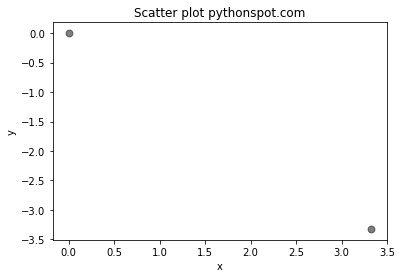

In [57]:
import matplotlib.pyplot as plt
N = 5
x = new_pca[0]
y = new_pca[1]
colors = (0,0,0)
area = np.pi*15
 
# Plot
plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()